In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("weight-height.csv")

In [7]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [9]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [11]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [12]:
df['Gender'].replace('Female', 0, inplace=True)

In [13]:
df['Gender'].replace('Male', 1, inplace=True)

In [14]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [16]:
df.iloc[:, :-1].values

array([[ 1.        , 73.84701702],
       [ 1.        , 68.78190405],
       [ 1.        , 74.11010539],
       ...,
       [ 0.        , 63.86799221],
       [ 0.        , 69.03424313],
       [ 0.        , 61.94424588]])

In [17]:
df.iloc[:, 2].values

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [19]:
X = df.iloc[:, :-1].values

In [20]:
y = df.iloc[:, 2].values

In [21]:
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
lin_reg = LinearRegression()

In [26]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
lin_pred = lin_reg.predict(X_test)

In [28]:
lin_pred

array([141.93828842, 176.55658781, 219.77836195, ..., 149.97129636,
       166.83374903, 138.87940678])

In [29]:
y_test

array([138.0857961 , 187.36336585, 216.53319128, ..., 152.42003134,
       170.10064728, 158.20620596])

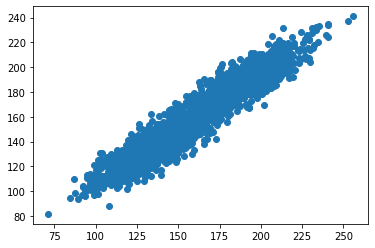

In [33]:
plt.scatter(y_test, lin_pred)

In [34]:
my_weight_pred = lin_reg.predict([[0,74]])

In [35]:
my_weight_pred

array([197.2481918])

In [40]:
acc = round(lin_reg.score(X_train, y_train) * 100, 2)

In [41]:
acc

90.21

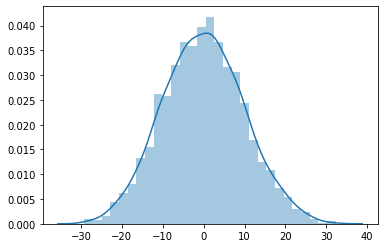

In [47]:
 sns.distplot((y_test-lin_pred))

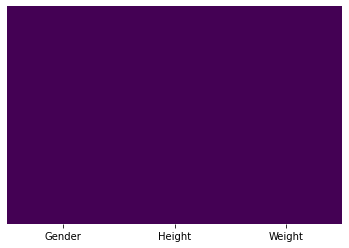

In [48]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')